<a href="https://colab.research.google.com/github/gianmarcomejia96/AIfundamentals/blob/main/13_ML_Full_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Full example

**Download datset**: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/chest-xray-pneumonia


### Training and evaluation

**Split dataset**

In [ ]:
# Step 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Set paths
base_dir = path + "/chest_xray"  # Adjust if needed
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Step 3: Data preprocessing
IMG_SIZE = (150, 150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir, target_size=IMG_SIZE, class_mode='binary', batch_size=BATCH_SIZE)
val_gen = val_datagen.flow_from_directory(val_dir, target_size=IMG_SIZE, class_mode='binary', batch_size=BATCH_SIZE)
test_gen = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, class_mode='binary', batch_size=1, shuffle=False)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**FC-NN**

In [ ]:
# FC-NN
model_fc = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_fc.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train FC-NN
history_fc = model_fc.fit(train_gen, epochs=5, validation_data=val_gen)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 271ms/step - accuracy: 0.6927 - loss: 3.0460 - val_accuracy: 0.5000 - val_loss: 0.6986
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 276ms/step - accuracy: 0.7494 - loss: 0.6392 - val_accuracy: 0.5000 - val_loss: 0.7355
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 273ms/step - accuracy: 0.7412 - loss: 0.5925 - val_accuracy: 0.5000 - val_loss: 0.7763
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 267ms/step - accuracy: 0.7347 - loss: 0.5809 - val_accuracy: 0.5000 - val_loss: 0.8063
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 273ms/step - accuracy: 0.7515 - loss: 0.5660 - val_accuracy: 0.5000 - val_loss: 0.8135


**CNN**

In [ ]:
# CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train CNN
history_cnn = model_cnn.fit(train_gen, epochs=5, validation_data=val_gen)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 88s 503ms/step - accuracy: 0.7933 - loss: 0.4558 - val_accuracy: 0.8750 - val_loss: 0.3710
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 294ms/step - accuracy: 0.9471 - loss: 0.1358 - val_accuracy: 0.8125 - val_loss: 0.3601
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 321ms/step - accuracy: 0.9572 - loss: 0.1034 - val_accuracy: 1.0000 - val_loss: 0.1332
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 306ms/step - accuracy: 0.9581 - loss: 0.1046 - val_accuracy: 0.9375 - val_loss: 0.1432
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 56s 343ms/step - accuracy: 0.9726 - loss: 0.0815 - val_accuracy: 0.8750 - val_loss: 0.1896


**Evaluate and Compare Models**

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Evaluate FC-NN
loss_fc, acc_fc = model_fc.evaluate(test_gen)
print(f'FC-NN Accuracy: {acc_fc:.4f}')

# Make predictions on the test set
test_gen.reset() # start datagernerator from the begining
y_pred = (model_fc.predict(test_gen) > 0.5).astype(int).flatten()
y_true = test_gen.classes

# Compute metrics
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"FC-NN Precision: {precision:.4f}")
print(f"FC-NN Recall: {recall:.4f}")
print(f"FC-NN F1 Score: {f1:.4f}")

# Evaluate CNN
loss_cnn, acc_cnn = model_cnn.evaluate(test_gen)
print(f'CNN Accuracy: {acc_cnn:.4f}')

# Make predictions on the test set
test_gen.reset() # start datagernerator from the begining
y_pred = (model_cnn.predict(test_gen) > 0.5).astype(int).flatten()
y_true = test_gen.classes

# Compute metrics
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"CNN Precision: {precision:.4f}")
print(f"CNN Recall: {recall:.4f}")
print(f"CNN F1 Score: {f1:.4f}")

624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.2583 - loss: 1.0555
FC-NN Accuracy: 0.6250
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
FC-NN Precision: 0.6250
FC-NN Recall: 1.0000
FC-NN F1 Score: 0.7692
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.5827 - loss: 1.9633
CNN Accuracy: 0.7756
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
CNN Precision: 0.7385
CNN Recall: 0.9923
CNN F1 Score: 0.8468


**Classification Report and Confusion Matrix**

624/624 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step
624/624 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step
FC-NN Classification Report:
              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00       234
   Pneumonia       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624

CNN Classification Report:
              precision    recall  f1-score   support

      Normal       0.97      0.41      0.58       234
   Pneumonia       0.74      0.99      0.85       390

    accuracy                           0.78       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.83      0.78      0.75       624



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


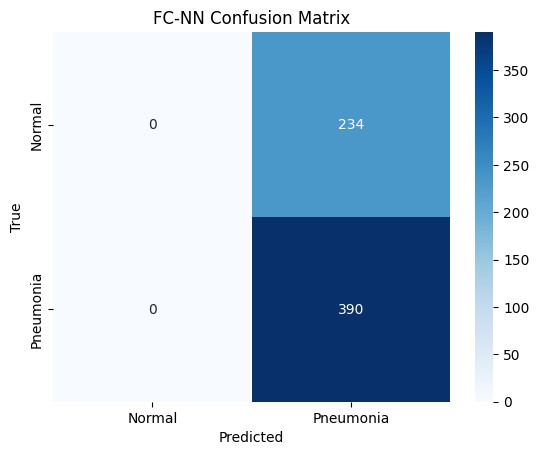

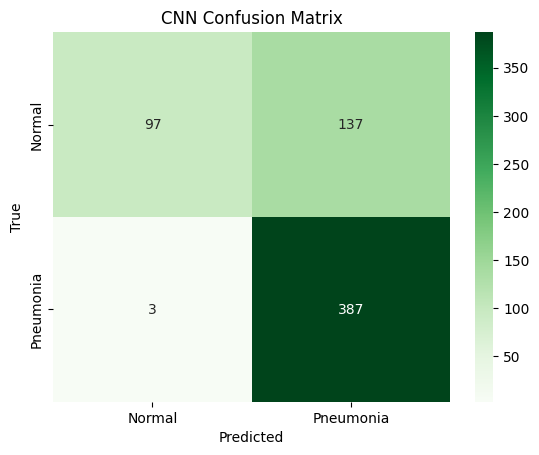

In [ ]:
# FC-NN Predictions
test_gen.reset()
preds_fc = (model_fc.predict(test_gen) > 0.5).astype(int).flatten()

# CNN Predictions
test_gen.reset()
preds_cnn = (model_cnn.predict(test_gen) > 0.5).astype(int).flatten()

# True labels
y_true = test_gen.classes

# FC-NN Report
print("FC-NN Classification Report:")
print(classification_report(y_true, preds_fc, target_names=['Normal', 'Pneumonia']))

# CNN Report
print("CNN Classification Report:")
print(classification_report(y_true, preds_cnn, target_names=['Normal', 'Pneumonia']))

# FC-NN Confusion Matrix
cm_fc = confusion_matrix(y_true, preds_fc)
sns.heatmap(cm_fc, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('FC-NN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# CNN Confusion Matrix
cm_cnn = confusion_matrix(y_true, preds_cnn)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# With FC-NN all clases are predicted as neumonia


**Save the model**

In [ ]:
model_cnn.save('cnn_chest_xray_model.h5')


### Use the model in production

**Load the Saved Model**

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved CNN model
loaded_model = load_model('cnn_chest_xray_model.h5')


**Run Inference on New/Test Images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


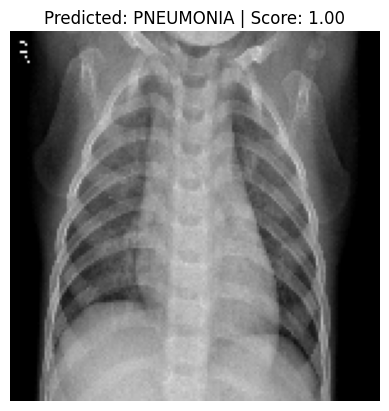

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


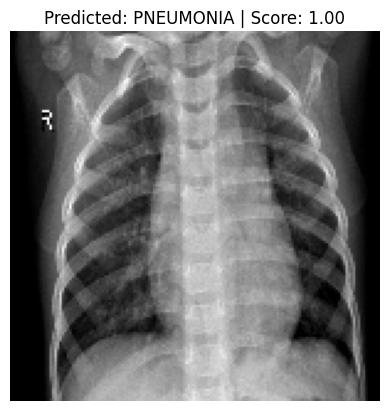

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


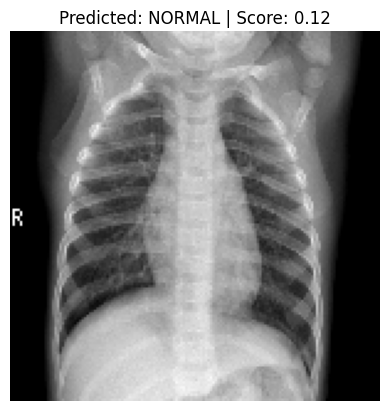

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


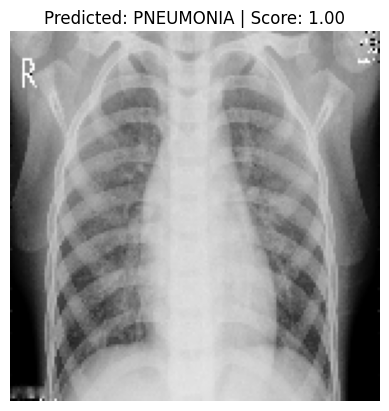

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


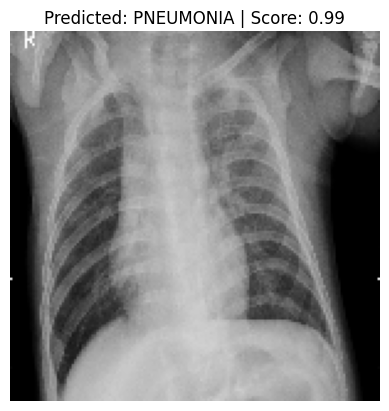

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


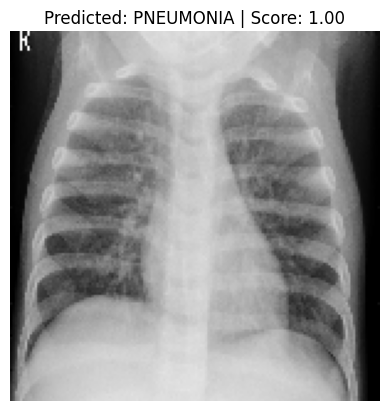

In [ ]:
import os
from tensorflow.keras.preprocessing import image

# Define path to some test images (e.g., first 5)
test_path = os.path.join(base_dir, 'test')
categories = ['NORMAL', 'PNEUMONIA']
test_images = []

# Collect image paths (just take 5 examples)
for category in categories:
    img_folder = os.path.join(test_path, category)
    files = [os.path.join(img_folder, f) for f in os.listdir(img_folder)[:3]]  # take 3 per class
    test_images.extend(files)

# Make predictions and display
for img_path in test_images:
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension. (150, 150, 3)  →  (1, 150, 150, 3)

    prediction = loaded_model.predict(img_array)[0][0]
    pred_label = 'PNEUMONIA' if prediction > 0.5 else 'NORMAL'

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {pred_label} | Score: {prediction:.2f}")
    plt.show()
